MTOM 
11x11 Gridworld
0-4 random walls, defined between two randomly sampled endpoints, could be diagonal

CMToM
11x11 Gridworld
0-6 random obstacles, 1x1

0-4 random walls
horiz, vert, or diag (45 or 135)
can overlap
random length, 1-6

In [1]:
import random
import copy
import numpy as np
from scipy.stats import dirichlet

In [2]:
def create_grid():
    grid = [[0] * 11 for _ in range(11)]
    for row in range(11):
        for col in range(11):
            grid[row][col] = u"\u2B1C"
    return grid
      
def print_grid(a):
    for row in a:
        for col in row:
            #print("{:^1}".format(col), end="")
            print(col, end="")
        print("")    
        
def add_barriers():
    # 0-4 random walls
    # random horiz, vert, or diag
    # can overlap
    # random length, 1-11
    
    num = random.randint(0,4)
    orient = ['h', 'v', 'd']
    h_dir = ['l', 'r']
    v_dir = ['u', 'd']
    count = 0
    #print(num)
    while count < num:
        o = random.choice(orient)
        l = random.randint(1,11)
        x = random.randint(0,10)
        y = random.randint(0,10)
        #y = 5
        if o == 'h':
            d = random.choice(h_dir)
            #d = 'r'
            if d == 'r':
                #print(y+l-1)
                if y+l-1 < 11:
                    yy = y
                    while yy < y+l:
                        #print(x, yy)
                        grid[x][yy] = u"\u2B1B"
                        yy += 1
                    count += 1
            else:
                if y-l+1 > -1:
                    yy = y
                    while yy > y-l:
                        grid[x][yy] = u"\u2B1B"
                        yy -= 1
                    count += 1
        elif o == 'v':
            d = random.choice(v_dir)
            if d == 'd':
                if x+l-1 < 11:
                    xx = x
                    while xx < x+l:
                        grid[xx][y] = u"\u2B1B"
                        xx += 1
                    count += 1
            else:
                if x-l+1 > -1:
                    xx = x
                    while xx > x-l:
                        grid[xx][y] = u"\u2B1B"
                        xx -= 1
                    count += 1
        else:
            hd = random.choice(h_dir)
            vd = random.choice(v_dir)
            if hd == 'r' and vd == 'd':
                if y+l-1 < 11 and x+l-1 < 11:
                    xx = x
                    yy = y
                    while yy < y+l:
                        grid[xx][yy] = u"\u2B1B"
                        xx += 1
                        yy += 1
                    count += 1
            elif hd == 'r' and vd == 'u':
                if y+l-1 < 11 and x-l+1 > -1:
                    xx = x
                    yy = y
                    while yy < y+l:
                        grid[xx][yy] = u"\u2B1B"
                        xx -= 1
                        yy += 1
                    count += 1
            elif hd == 'l' and vd == 'd':
                if y-l+1 > -1 and x+l-1 < 11:
                    xx = x
                    yy = y
                    while yy > y-l:
                        grid[xx][yy] = u"\u2B1B"
                        xx += 1
                        yy -= 1
                    count += 1
            else:
                if y-l+1 > -1 and x-l+1 > -1:
                    xx = x
                    yy = y
                    while yy > y-l:
                        grid[xx][yy] = u"\u2B1B"
                        xx -= 1
                        yy -= 1
                    count += 1
    
def add_objects():
    B = ()
    G = ()
    O = ()
    P = ()
    objs = ['B','G','O','P']
    for c in objs:
        place = False
        while place == False:
            x = random.randint(0,10)
            y = random.randint(0,10)
            if grid[x][y] == u"\u2B1C":
                if c == 'B':
                    grid[x][y] = u"\U0001F535"
                    B = (x,y)
                elif c == 'G':
                    grid[x][y] = u"\U0001F7E2"
                    G = (x,y)
                elif c == 'O':
                    grid[x][y] = u"\U0001F7E0"
                    O = (x,y)
                elif c == 'P':
                    grid[x][y] = u"\U0001F7E3"
                    P = (x,y)
                place = True
    return B,G,O,P

def add_player():
    A = ()
    found = False
    while found == False:
        x = random.randint(0,10)
        y = random.randint(0,10)
        if grid[x][y] == u"\u2B1C":
            #grid[x][y] = u"\U0001F534"
            grid[x][y] = u"\u2B55"
            found = True
            A = (x,y)
    return A

def check_left(pos):
    move = True
    if pos[1] == 0 or grid[pos[0]][pos[1]-1] == u"\u2B1B":
        move = False
    return move

def check_right(pos):
    move = True
    if pos[1] == 10 or grid[pos[0]][pos[1]+1] == u"\u2B1B":
        move = False
    return move

def check_up(pos):
    move = True
    if pos[0] == 0 or grid[pos[0]-1][pos[1]] == u"\u2B1B":
        move = False
    return move

def check_down(pos):
    move = True
    if pos[0] == 10 or grid[pos[0]+1][pos[1]] == u"\u2B1B":
        move = False
    return move

def navigate_sto(A,B,G,O,P):
    moves = 0
    pos = A
    path = [pos]
    move = ['r', 'l', 'u', 'd']
    while moves < 31:
        if check_left(pos) or check_right(pos) or check_up(pos) or check_down(pos):
            move_dir = random.choice(move)
            if move_dir == 'r':
                if check_right(pos):
                    #put agent in new position 1 to the right
                    grid[pos[0]][pos[1]+1] = u"\u2B55"
                    #put right arrow in old position
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9E"
                    #make new position current position
                    pos = (pos[0], pos[1]+1)
                    #Increment move counter
                    moves += 1
                    #check if new position contains one of the targets
                    if pos == B or pos == G or pos == O or pos == P:
                        print('Object Eaten, Game Over!')
                        print('Moves: ', moves)
                        print_grid(grid)
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            elif move_dir == 'l':
                if check_left(pos):
                    grid[pos[0]][pos[1]-1] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9C"
                    pos = (pos[0], pos[1]-1)
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        print('Object Eaten, Game Over!')
                        print('Moves: ', moves)
                        print_grid(grid)
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            elif move_dir == 'u':
                if check_up(pos):
                    grid[pos[0]-1][pos[1]] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9D"
                    pos = (pos[0]-1, pos[1])
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        print('Object Eaten, Game Over!')
                        print('Moves: ', moves)
                        print_grid(grid)
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            elif move_dir == 'd':
                if check_down(pos):
                    grid[pos[0]+1][pos[1]] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9F"
                    pos = (pos[0]+1, pos[1])
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        print('Object Eaten, Game Over!')
                        print('Moves: ', moves)
                        print_grid(grid)
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            if len(path) > moves:
                path[moves] = pos
            else:
                path.append(pos)
        else:
            break

        print('Move: ', moves)
        print_grid(grid)
        #print()
    if moves == 31:
        print('31 moves, Game Over!')
    return moves, path

In [3]:
'''
left arrow --> u"\u2B9C"
up arrow --> u"\u2B9D"
right arrow --> u"\u2B9E"
down arrow --> u"\u2B9F"
'''

'\nleft arrow --> u"⮜"\nup arrow --> u"⮝"\nright arrow --> u"⮞"\ndown arrow --> u"⮟"\n'

In [4]:
grid = create_grid()
add_barriers()
B,G,O,P = add_objects()
A = add_player()

print('Original Grid:')
print_grid(grid)
moves, path = navigate_sto(A,B,G,O,P)

Original Grid:
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⭕⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🔵⬜⬜
Move:  1
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜ ⮞⭕⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🔵⬜⬜
Move:  2
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⭕ ⮜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🔵⬜⬜
Move:  3
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜ ⮞⭕⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🔵⬜⬜
Move:  4
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜ ⮞ ⮞⭕⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🔵⬜⬜
Move:  5
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜ ⮞ ⮞ ⮟⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⭕⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🔵⬜⬜
Move:  6
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟠⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜ ⮞ ⮞ ⮟⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜ ⮞⭕⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜🟢⬜
⬜⬜🟣⬛⬛⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜

In [5]:
i = 0
while i < len(path):
    print(i, path[i])
    i += 1

0 (4, 5)
1 (4, 6)
2 (4, 5)
3 (4, 6)
4 (4, 7)
5 (5, 7)
6 (5, 8)
7 (4, 8)
8 (4, 7)
9 (3, 7)
10 (2, 7)
11 (3, 7)
12 (4, 7)
13 (3, 7)
14 (3, 6)
15 (3, 7)
16 (2, 7)
17 (2, 6)
18 (2, 5)
19 (1, 5)
20 (1, 4)
21 (1, 5)
22 (2, 5)
23 (3, 5)
24 (4, 5)
25 (4, 6)
26 (4, 7)
27 (3, 7)
28 (2, 7)
29 (2, 6)
30 (2, 7)
31 (1, 7)


In [5]:
def navigate_sto_np(A,B,G,O,P):
    moves = 0
    pos = A
    path = [pos]
    move = ['r', 'l', 'u', 'd']
    while moves < 31:
        if check_left(pos) or check_right(pos) or check_up(pos) or check_down(pos):
            move_dir = random.choice(move)
            if move_dir == 'r':
                if check_right(pos):
                    grid[pos[0]][pos[1]+1] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9E"
                    pos = (pos[0], pos[1]+1)
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            elif move_dir == 'l':
                if check_left(pos):
                    grid[pos[0]][pos[1]-1] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9C"
                    pos = (pos[0], pos[1]-1)
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            elif move_dir == 'u':
                if check_up(pos):
                    grid[pos[0]-1][pos[1]] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9D"
                    pos = (pos[0]-1, pos[1])
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            elif move_dir == 'd':
                if check_down(pos):
                    grid[pos[0]+1][pos[1]] = u"\u2B55"
                    grid[pos[0]][pos[1]] = ' ' + u"\u2B9F"
                    pos = (pos[0]+1, pos[1])
                    moves += 1
                    if pos == B or pos == G or pos == O or pos == P:
                        if len(path) > moves:
                            path[moves] = pos
                        else:
                            path.append(pos)
                        break
            if len(path) > moves:
                path[moves] = pos
            else:
                path.append(pos)
        else:
            break
    return moves, path

In [6]:
sto_agents = {}
for i in range(1000000):
    grid = create_grid()
    add_barriers()
    B,G,O,P = add_objects()
    A = add_player()
    og = copy.deepcopy(grid)
    m,p = navigate_sto_np(A,B,G,O,P)
    sto_agents[i] = (og, p, m)

In [7]:
sum = 0
for i in range(1000000):
    sum += sto_agents[i][2]
    i += 1
sum/len(sto_agents)

23.056534

In [8]:
no_moves = []
for i in range(1000000):
    if sto_agents[i][2] == 0:
        no_moves.append(i)
        
x = random.randint(0,len(no_moves)-1)
print_grid(sto_agents[no_moves[x]][0])


⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟣⬜⬜⬜⬜🔵⬜⬜⬜⬜⬛
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜
⬛⬜⬛⬛⬜⬜⬛⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬛⬜⬜⬛🟠⬜
⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜
⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛
⬛⬜⬛⬜⬜🟢⬜⬜⬜⬜⬜
⭕⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [7]:
alpha = [.01, .03, .1, .3, 1, 3]
for a in alpha:
    y = []
    for t in range(1000):
        x = np.random.dirichlet([a/4,a/4,a/4,a/4])
        y.append(np.std(x))
    print(a, np.mean(y))


0.01 0.42970936355641925
0.03 0.42623276482793776
0.1 0.4095145785898875
0.3 0.37573967253264356
1 0.2964132648936771
3 0.2041074747330996


0.01 0.4218009783649391
0.03 0.40408029671281603
0.1 0.36126553109546544
0.3 0.2806773392410349
1 0.18460251886011353
3 0.11010818398354565


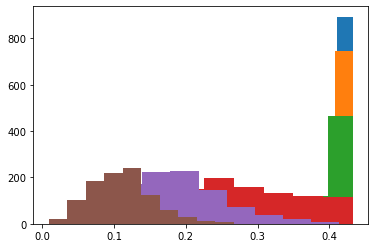

In [11]:
import matplotlib.pyplot as plt
for a in alpha:
    y = []
    z = []
    for t in range(1000):
        x = np.random.dirichlet([a,a,a,a])
        y.append(np.std(x))
    print(a, np.mean(y))
    
    plt.hist(y)

In [55]:
for a in alpha:
    y = []
    for t in range(1000):
        x = scipy.stats.dirichlet.rvs([a/4,a/4,a/4,a/4])
        y.append(np.std(x))
    print(a, np.mean(y))

0.01 nan
0.03 0.4256313583839684
0.1 0.41175889067054733
0.3 0.3744647100926367
1 0.2970861818966697
3 0.20475567943096956
